<a href="https://colab.research.google.com/github/OksanaGlazkova/DI/blob/main/Junior_DE_%D0%93%D0%BB%D0%B0%D0%B7%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9E%D0%BA%D1%81%D0%B0%D0%BD%D0%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3 as sl

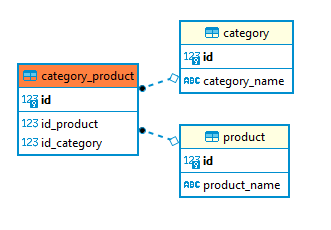

In [ ]:
con = sl.connect('my-test.db')

In [ ]:
with con:
    con.execute("""
        create table product (
	      id serial primary key,
	      product_name varchar(100) not null
	      );
    """)

In [ ]:
sql = 'INSERT INTO product (id, product_name) values(?, ?)'
data_product = [
    ('1', 'baby milk'),
    ('2', 'cucumber'),
    ('3', 'cheese'),
    ('4', 'strawberry')    
]

In [ ]:
with con:
    con.executemany(sql, data_product)

In [ ]:
with con:
    con.execute("""
        create table category (
	      id serial primary key,
	      category_name varchar(100) not null
      	);
    """)

In [ ]:
sql = 'INSERT INTO category (id, category_name) values(?, ?)'
data_category = [
    ('1', 'milky'),
    ('2', 'vegetables'),
    ('3', 'meat'),
    ('4', 'baby')
]

In [ ]:
with con:
    con.executemany(sql, data_category)

In [ ]:
with con:
    con.execute("""
        create table category_product (
	      id serial primary key,
	      id_product integer references product(id),
	      id_category integer references category(id)
	      );
    """)

In [ ]:
sql = 'INSERT INTO category_product (id, id_product, id_category) values(?, ?, ?)'
data_category_product = [
    ('1', '1', '1'),
    ('2', '1', '4'),
    ('3', '2', '2'),
    ('4', '3', '1')
]

In [ ]:
with con:
    con.executemany(sql, data_category_product)

In [ ]:
sql = 'INSERT INTO category_product (id, id_product) values(?, ?)'
data_category_product = [
    ('5', '4')
]

In [ ]:
with con:
    con.executemany(sql, data_category_product)

In [ ]:
sql = 'INSERT INTO category_product (id, id_category) values(?, ?)'
data_category_product = [
    ('6', '3')
]

In [ ]:
with con:
    con.executemany(sql, data_category_product)

In [ ]:
df_product = pd.read_sql('''SELECT * FROM product''', con)
df_product

,id,product_name
0,1,baby milk
1,2,cucumber
2,3,cheese
3,4,strawberry


In [ ]:
df_category = pd.read_sql('''SELECT * FROM category''', con)
df_category

,id,category_name
0,1,milky
1,2,vegetables
2,3,meat
3,4,baby


In [ ]:
df_category_product = pd.read_sql('''SELECT * FROM category_product ''', con)
df_category_product

,id,id_product,id_category
0,1,1.0,1.0
1,2,1.0,4.0
2,3,2.0,2.0
3,4,3.0,1.0
4,5,4.0,NaN
5,6,NaN,3.0


**Список всех продуктов с их категориями:**

In [ ]:
df1 = pd.read_sql('''select distinct product_name, category_name
from product p
left join category_product cp on p.id = cp.id_product
left join category c on cp.id_category = c.id''', con)
df1

,product_name,category_name
0,baby milk,milky
1,baby milk,baby
2,cucumber,vegetables
3,cheese,milky
4,strawberry,None


**Список категорий с продуктами:**

In [ ]:
df2 = pd.read_sql('''select distinct category_name, product_name
from category c
left join category_product cp on c.id = cp.id_category
left join product p on cp.id_product = p.id''', con)
df2

,category_name,product_name
0,milky,baby milk
1,milky,cheese
2,vegetables,cucumber
3,meat,None
4,baby,baby milk


**Список всех пар «Имя продукта – Имя категории».**
Если у продукта нет категорий, то он все равно должен выводиться.
Если у категории нет продуктов, то она все равно должна выводиться:

In [ ]:
df3 = pd.read_sql('''select distinct product_name, category_name
from product p
left join category_product cp on p.id = cp.id_product
left join category c on cp.id_category = c.id
Union
select distinct product_name, category_name
from category c
left join category_product cp on c.id = cp.id_category
left join product p on cp.id_product = p.id''', con)
df3

,product_name,category_name
0,None,meat
1,baby milk,baby
2,baby milk,milky
3,cheese,milky
4,cucumber,vegetables
5,strawberry,None
